In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv("churn.csv")

In [4]:
df.shape

(3333, 21)

In [5]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [16]:
sns.kdeplot(data=df, x="total day minutes",  hue="churn")

<Axes: xlabel='total day minutes', ylabel='Density'>

In [15]:
g= sns.FacetGrid(df, col="churn")
g.map(plt.hist, "total day minutes")

In [17]:
df["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

<Axes: xlabel='voice mail plan', ylabel='count'>

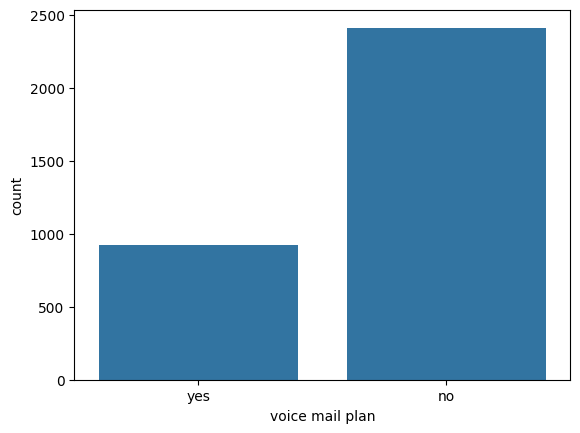

In [18]:
sns.countplot(data=df, x="voice mail plan")

In [20]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(data=df, x="voice mail plan", hue="churn")

<Axes: xlabel='voice mail plan', ylabel='count'>

In [23]:
sns.boxplot(data=df, x="international plan",y="area code" )

<Axes: xlabel='international plan', ylabel='area code'>

<Axes: xlabel='area code', ylabel='count'>

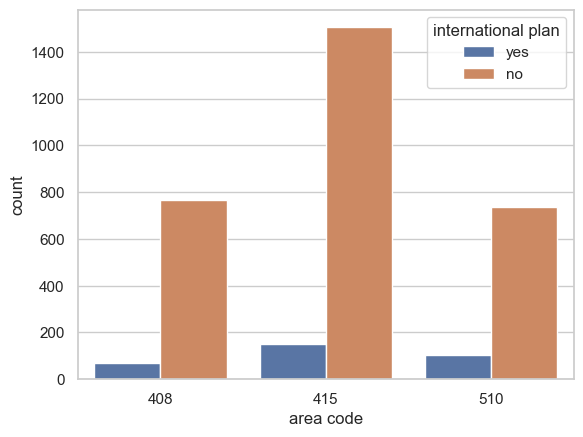

In [25]:
sns.countplot(data=df, hue="international plan",x="area code" )

<Axes: xlabel='international plan', ylabel='area code'>

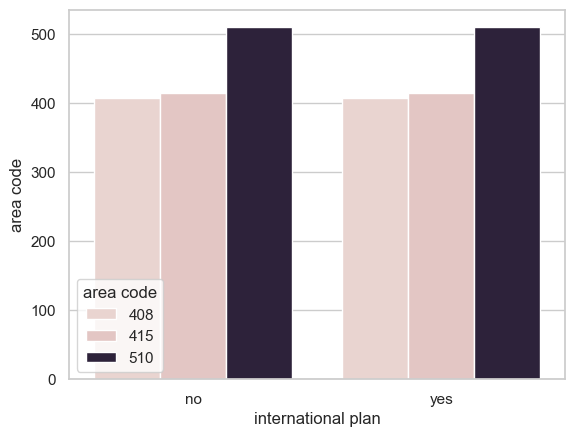

In [27]:
sns.barplot(df, x="international plan",y="area code",hue='area code')

In [28]:
pd.crosstab(df["area code"], df["churn"])

churn      False  True 
area code              
408          716    122
415         1419    236
510          715    125

In [31]:
pd.pivot_table(df, index=['state'],
                     columns=[ 'area code'],values=['account length'] ,aggfunc=len)

account length        
area code            408 415 510
state                           
AK                    14  24  14
AL                    25  40  15
AR                    13  27  15
AZ                    15  36  13
CA                     7  17  10
CO                    25  29  12
CT                    22  39  13
DC                    14  27  13
DE                    13  31  17
FL                    12  31  20
GA                    15  21  18
HI                    15  30   8
IA                     8  20  16
ID                    12  41  20
IL                    15  28  15
IN                    18  33  20
KS                    12  37  21
KY                    15  32  12
LA                    13  27  11
MA                    24  29  12
MD                    16  39  15
ME                    15  25  22
MI                    12  39  22
MN                    20  40  24
MO                    15  37  11
MS                    15  31  19
MT                    17  34  17
NC                    25  28  15
ND                    19  28  15
NE                    13  34  14
NH                    25  19  12
NJ                    15  34  19
NM                    16  35  11
NV                    14  34  18
NY                    19  47  17
OH                    22  40  16
OK                    17  27  17
OR                    14  44  20
PA                    14  19  12
RI                    12  35  18
SC                    13  30  17
SD                    16  28  16
TN                    11  30  12
TX                    20  37  15
UT                    12  37  23
VA                    25  35  17
VT                    17  36  20
WA                    23  26  17
WI                    22  35  21
WV                    20  52  34
WY                    17  41  19

In [33]:
df['area code'] = df['area code'].astype('category')

C:\Users\000SWG744\AppData\Local\Temp\ipykernel_23672\2139183244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


<Axes: >

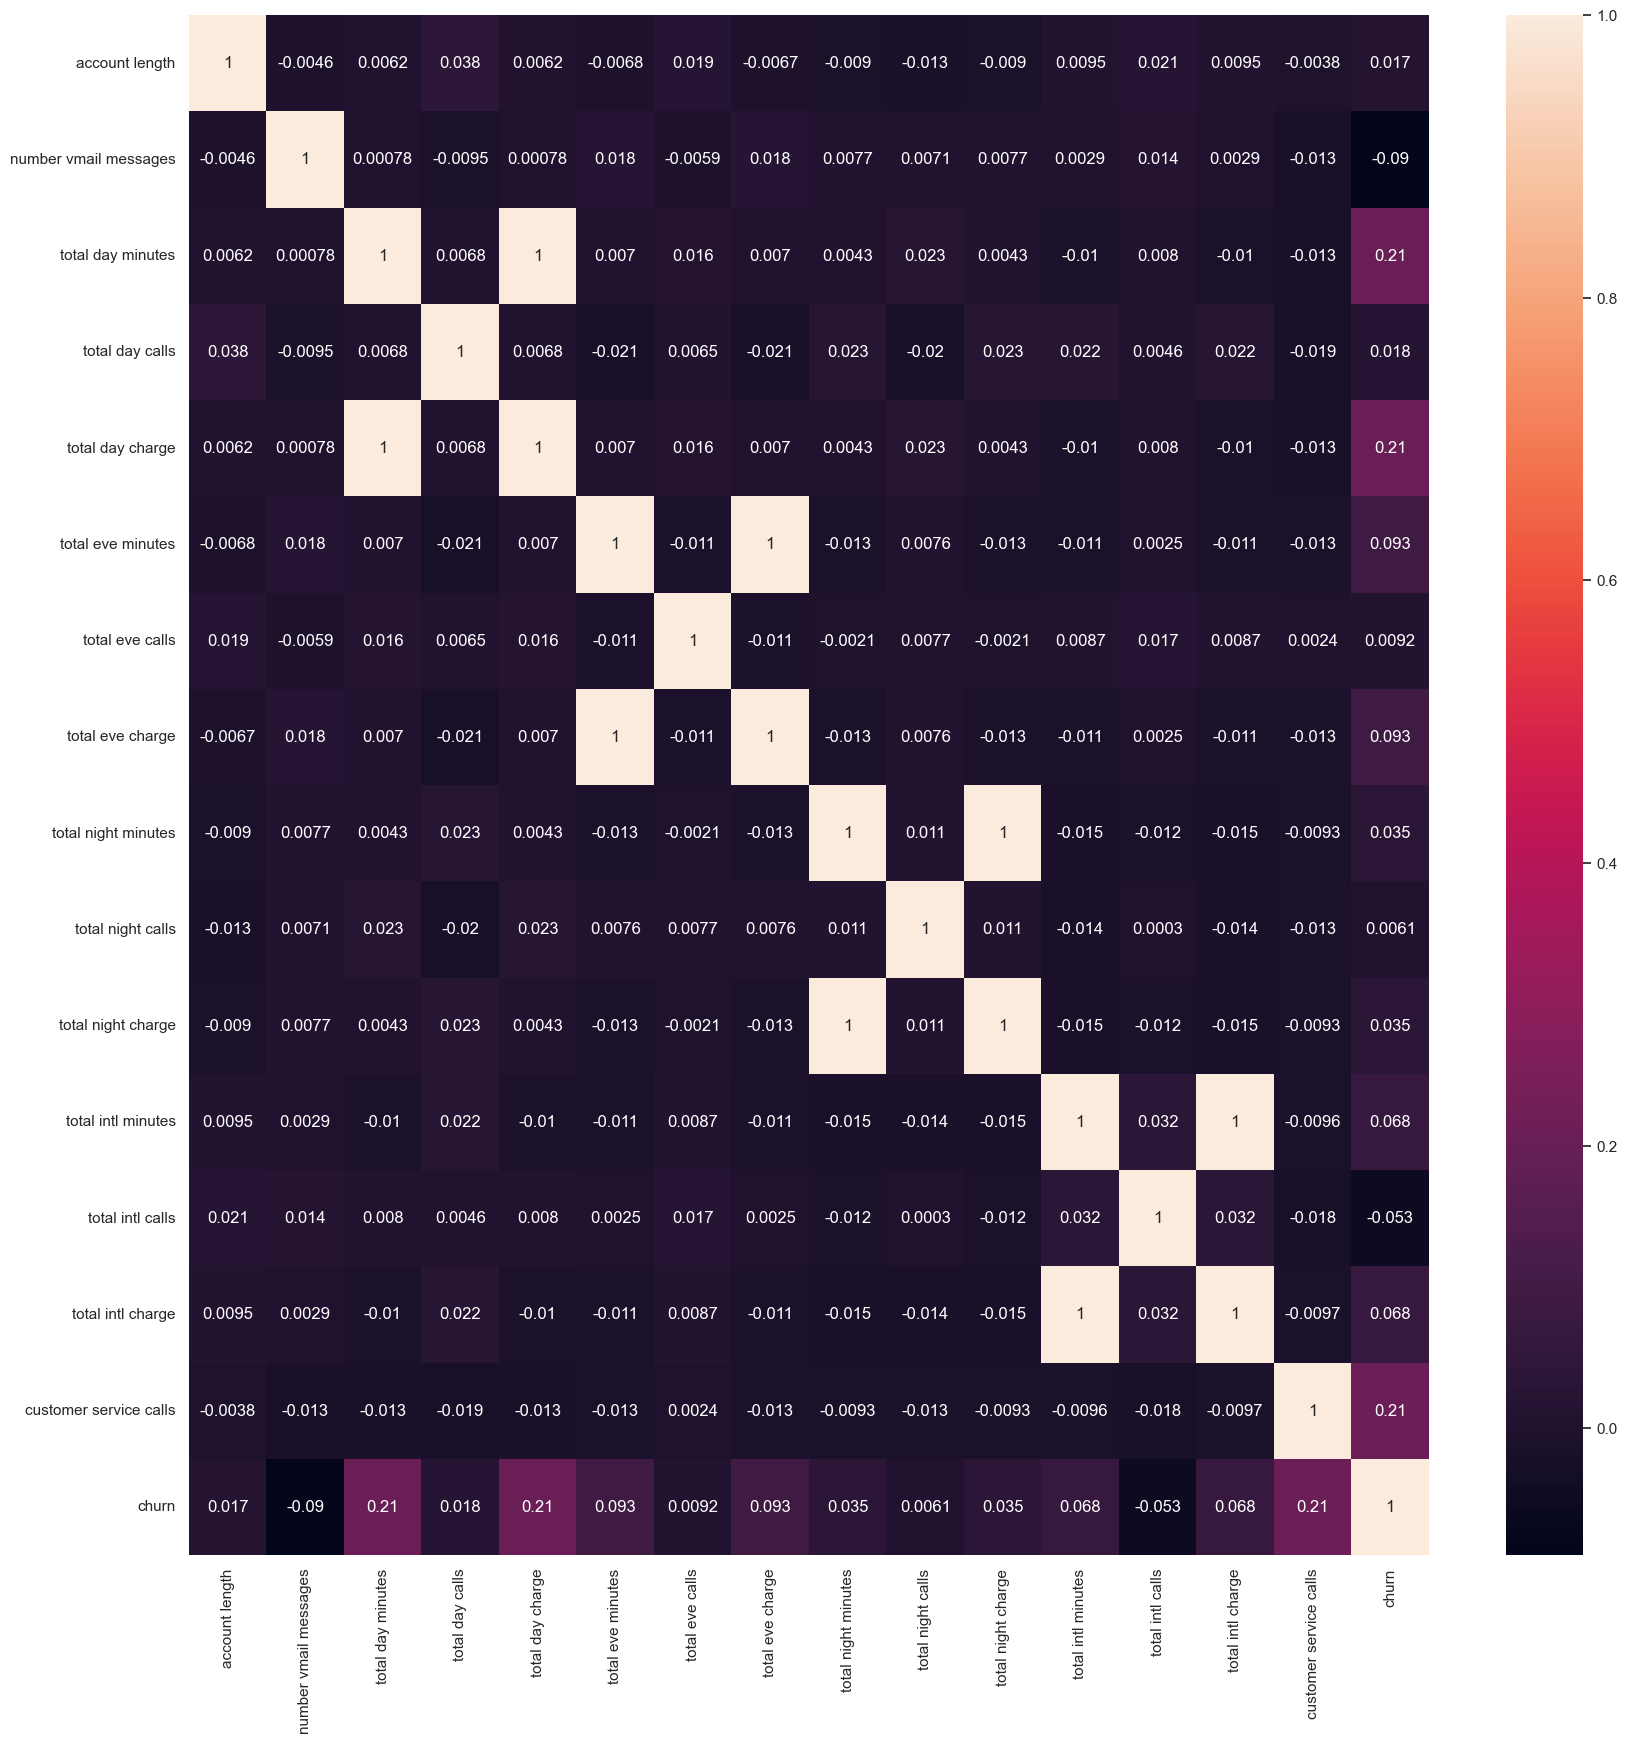

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True)

In [40]:
df['total day minutes'].std()

54.46738920237137

In [41]:
df['total day minutes'].var()

2966.696486522602

In [44]:
ls=np.array([81, 62, 85, 65, 76, 86, 78, 80, 87])

In [45]:
ls


array([81, 62, 85, 65, 76, 86, 78, 80, 87])

In [57]:
np.median([2, 4, 4, 3, 8, 67, 23])

4.0

In [50]:
np.std([5, 7, 7, 4, 6, 8, 10, 13])

2.692582403567252

In [51]:
np.std([6, 7, 6, 8, 7, 9, 9, 8])

1.118033988749895

In [52]:
X = 45,38,67,98,45,23,99,76,85,77

In [53]:
Y = 67,54,98,54,32,78,86,93,55,59

In [56]:
np.corrcoef(X,Y)

array([[1.        , 0.16619328],
       [0.16619328, 1.        ]])